# Projeto de Análise e Tratamento de Dados - Educação na Bahia (2020)

## Introdução:

Este projeto visa analisar dados educacionais na Bahia em 2020, focando nas cidades principais e na Região Metropolitana de Salvador. A tabela fornece informações sobre a presença de laboratórios de informática, computadores, e acesso à internet em escolas.

Banco de Dados CSV: (https://analitico.qedu.org.br/) 

Obs. Foi realizado o filtro no site para obter o banco de dados necessário para o cenário porposto na pesquisa. O ano mais recente disponível foi de 2020.



## Processamento:


In [105]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 - Leitura e Tratamento do DataFrame:

In [106]:
# Carregando os dados do CSV
df = pd.read_csv('Dados_QEdu.csv', delimiter=';')
df

,COD Municipio,Cidade,COD UF,UF,Total de escolas que nao possuem laboratório de informatica,Total de escolas que possuem laboratório de informatica,Total de escolas que nao possuem computador,Total de escolas que possuem computador,Total de escolas que não possuem acesso a internet,Total de escolas que possuem acesso a internet,...,Total de computadores em uso pelos alunos - tablet,Total de escolas que nao possuem acesso a internet para os alunos,Total de escolas que possuem acesso a internet para os alunos,Total de escolas que não possuem acesso a internet para uso nos processos de ensino e aprendizagem,Total de escolas que possuem acesso a internet para uso nos processos de ensino e aprendizagem,Total de escolas sem rede local,Total de escolas com rede local a cabo,Total de escolas com rede local wireless,Total de escolas com rede local a cabo e wireless,Total de escolas com rede não informada
0,2916104,Itaparica,29,BA,21,3,"1,0",23,"3,0",21,...,0,23,"1,0",17,7,5,3,5,6,"5,0"
1,2910800,Feira de Santana,29,BA,312,98,"11,0",399,"2,0",408,...,406,171,"239,0",109,301,58,54,42,224,"32,0"
2,2932903,Valenca,29,BA,135,25,"75,0",85,"69,0",91,...,55,145,"15,0",115,45,13,32,15,15,"85,0"
3,2906501,Candeias,29,BA,48,31,"3,0",76,"2,0",77,...,15,76,"3,0",73,6,6,9,47,2,"15,0"
4,2927408,Salvador,29,BA,1006,429,"45,0",1390,"26,0",1409,...,92605,1061,"374,0",918,517,289,349,192,450,"155,0"
5,2913606,Ilheus,29,BA,60,37,"8,0",89,"12,0",85,...,30,82,"15,0",68,29,24,19,16,21,"17,0"
6,2914802,Itabuna,29,BA,90,55,"11,0",134,"13,0",132,...,54,101,"44,0",80,65,30,20,16,63,"16,0"
7,2910057,Dias dAvila,29,BA,57,8,"2,0",63,"1,0",64,...,5,57,"8,0",56,9,7,19,12,14,"13,0"
8,2933208,Vera Cruz,29,BA,46,8,"8,0",46,"3,0",51,...,6,47,"7,0",32,22,12,8,5,15,"14,0"
9,2919207,Lauro de Freitas,29,BA,93,37,"19,0",111,"33,0",97,...,249,95,"35,0",101,29,8,51,8,19,"44,0"


In [126]:
# Informações sobre os tipos de dados e valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 32 columns):
 #   Column                                                                                              Non-Null Count  Dtype 
---  ------                                                                                              --------------  ----- 
 0   COD Municipio                                                                                       20 non-null     int64 
 1   Cidade                                                                                              20 non-null     object
 2   COD UF                                                                                              20 non-null     int64 
 3   UF                                                                                                  20 non-null     object
 4   Total de escolas que nao possuem laboratório de informatica                                         20 non-null     int64 
 

In [108]:
# Tratamento de valores nulos (substituindo por zero neste exemplo)
df = df.fillna(0)

In [109]:
# Estatísticas descritivas
descricao_dados = df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 32 columns):
 #   Column                                                                                              Non-Null Count  Dtype 
---  ------                                                                                              --------------  ----- 
 0   COD Municipio                                                                                       20 non-null     int64 
 1   Cidade                                                                                              20 non-null     object
 2   COD UF                                                                                              20 non-null     int64 
 3   UF                                                                                                  20 non-null     object
 4   Total de escolas que nao possuem laboratório de informatica                                         20 non-null     int64 
 

In [118]:
# Cidades da Região Metropolitana de Salvador
cidades_regiao_metropolitana = ['Salvador', 'Camacari', 'Candeias', 'Lauro de Freitas', 'Simoes Filho', 'Madre de Deus', 'Mata de São João', 'Sao Francisco do Conde', 'Vera Cruz', 'Itaparica', 'Dias dAvila', 'Santo Antonio de Jesus', 'Sao Sebastiao do Passe']
# Filtrar DataFrame para Cidades da Região Metropolitana de Salvador
df_regiao_metropolitana = df[df['Cidade'].isin(cidades_regiao_metropolitana)]
df_regiao_metropolitana.info

<bound method DataFrame.info of     COD Municipio                  Cidade  COD UF  UF  \
0         2916104               Itaparica      29  BA   
3         2906501                Candeias      29  BA   
4         2927408                Salvador      29  BA   
7         2910057             Dias dAvila      29  BA   
8         2933208               Vera Cruz      29  BA   
9         2919207        Lauro de Freitas      29  BA   
10        2905701                Camacari      29  BA   
11        2919926           Madre de Deus      29  BA   
12        2930709            Simoes Filho      29  BA   
14        2929503  Sao Sebastiao do Passe      29  BA   
16        2921005        Mata de São João      29  BA   
17        2929206  Sao Francisco do Conde      29  BA   
19        2928703  Santo Antonio de Jesus      29  BA   

    Total de escolas que nao possuem laboratório de informatica  \
0                                                  21             
3                                  

In [119]:
# Cidades fora da Região Metropolitana de Salvador
cidades_fora_regiao_metropolitana = [cidade for cidade in df['Cidade'].unique() if cidade not in cidades_regiao_metropolitana]

# Filtrar DataFrame para Cidades fora da Região Metropolitana de Salvador
df_fora_regiao_metropolitana = df[df['Cidade'].isin(cidades_fora_regiao_metropolitana)]
df_fora_regiao_metropolitana.info

<bound method DataFrame.info of     COD Municipio                Cidade  COD UF  UF  \
1         2910800      Feira de Santana      29  BA   
2         2932903               Valenca      29  BA   
5         2913606                Ilheus      29  BA   
6         2914802               Itabuna      29  BA   
13        2925204                Pojuca      29  BA   
15        2918001                Jequie      29  BA   
18        2933307  Vitoria da Conquista      29  BA   

    Total de escolas que nao possuem laboratório de informatica  \
1                                                 312             
2                                                 135             
5                                                  60             
6                                                  90             
13                                                 23             
15                                                 49             
18                                                205     

In [127]:
total_escolas_com_internet_rm = df[df['Cidade'].isin(['Salvador', 'Camaçari', 'Lauro de Freitas', 'Simoes Filho', 'Mata de São João', 'Dias dAvila', 'Madre de Deus', 'Pojuca', 'Sao Sebastiao do Passe'])]
total_escolas_com_internet_rm = total_escolas_com_internet_rm['Total de escolas que possuem acesso a internet'].sum()
print(f'Total de escolas com acesso à internet na Região Metropolitana: {total_escolas_com_internet_rm}')


Total de escolas com acesso à internet na Região Metropolitana: 1791


In [133]:
total_cidades_sem_internet_fora_rm = df[~df['Cidade'].isin(['Salvador', 'Camaçari', 'Lauro de Freitas', 'Simoes Filho', 'Mata de São João', 'Dias dAvila', 'Madre de Deus', 'Pojuca', 'Sao Sebastiao do Passe'])]
total_cidades_sem_internet_fora_rm = total_cidades_sem_internet_fora_rm['Total de escolas que possuem acesso a internet'].sum()
print(f'Total de escolas com acesso à internet fora da Região Metropolitana: {total_cidades_sem_internet_fora_rm}')

Total de escolas com acesso à internet fora da Região Metropolitana: 1480


## Visualizações / Insights:

Grafico 1. Disparidade na Infraestrutura Tecnológica:

Mostra a distribuição do número de computadores utilizados pelos alunos em diferentes estados. O boxplot destaca variações na infraestrutura tecnológica.

C:\Users\Djleo\AppData\Local\Temp\ipykernel_72548\3866746175.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total de escolas que possuem acesso a internet', y='Cidade', data=df_rm_sorted, palette='viridis')


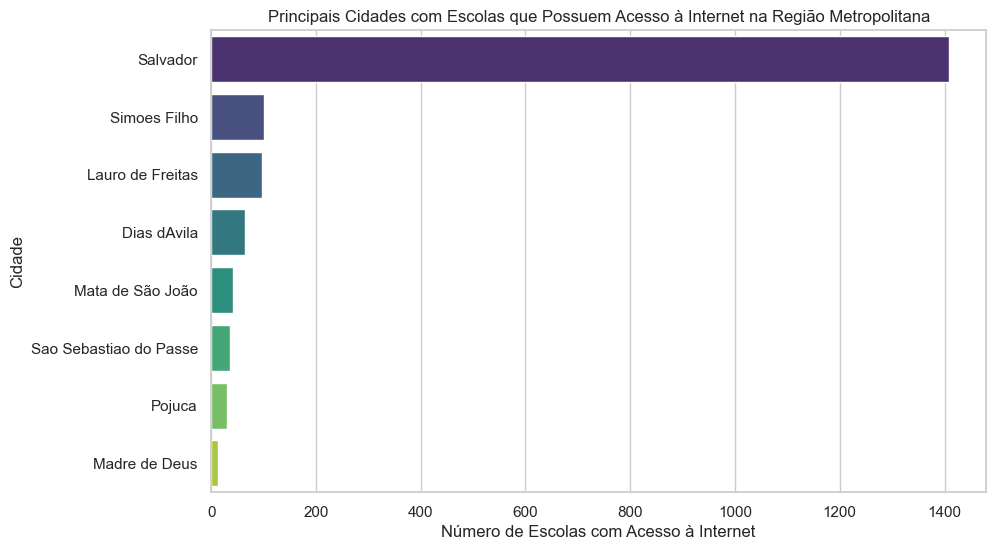

In [135]:
# Filtrando as cidades da Região Metropolitana
cidades_rm = ['Salvador', 'Camaçari', 'Lauro de Freitas', 'Simoes Filho', 'Mata de São João', 'Dias dAvila', 'Madre de Deus', 'Pojuca', 'Sao Sebastiao do Passe']
df_rm = df[df['Cidade'].isin(cidades_rm)]

# Ordenando as cidades pelo número de escolas com acesso à internet
df_rm_sorted = df_rm.sort_values(by='Total de escolas que possuem acesso a internet', ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Total de escolas que possuem acesso a internet', y='Cidade', data=df_rm_sorted, palette='viridis')
plt.title('Principais Cidades com Escolas que Possuem Acesso à Internet na Região Metropolitana')
plt.xlabel('Número de Escolas com Acesso à Internet')
plt.ylabel('Cidade')
plt.show()

### Insights:


- O gráfico destaca que Salvador lidera em número de escolas com acesso à internet na Região Metropolitana, indicando um maior investimento em infraestrutura tecnológica na capital.

- Madre de Deus apresenta o menor número de escolas com acesso à internet na Região Metropolitana, destacando desafios específicos em relação à infraestrutura tecnológica nessa localidade. Este cenário sugere a necessidade de estratégias direcionadas para melhorar a conectividade e recursos tecnológicos nas escolas de Madre de Deus, visando proporcionar condições mais equitativas de acesso à educação digital. Investimentos em infraestrutura e programas específicos podem ser considerados para impulsionar a inclusão digital nessa comunidade.